# Introduction

The dataset provides details on advertising spending across various mediums (TV, Radio, Newspaper) alongside corresponding sales figures.
Here's a summary:

**TV:** Expenditure on TV advertising.

**Radio:** Expenditure on radio advertising.

**Newspaper:** Expenditure on newspaper advertising.

**Sales:** Recorded sales figures (in thousands).


**Problem Statement:** In the realm of business advertising, the objective is to create a predictive model that forecasts sales figures based on advertising expenditures across different mediums like TV, Radio, and Newspaper. By employing machine learning techniques in Python, businesses can analyze past data to inform decisions on advertising strategies, optimizing resource allocation and maximizing sales potential.

# Load Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


**Import Libraries**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**View Dataset**

In [3]:
# Load the dataset
data = pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv")

# Display the first few rows of the dataset
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


# Data Preprocessing
We'll check for any missing values, handle categorical variables (if any), and split the data into training and testing sets.

**Check for any missing values**

In [4]:
missing_values = data.isnull().sum()

print("Missing Values:")
print(missing_values)


Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Dataset is complete and you don't need to handle any missing values during the data preprocessing stage.

**Training and Testing**

In [5]:
# Separate features (X) and target variable (y)
X = data.drop('Sales', axis=1)
y = data['Sales']

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Analysis

**ScatterPlot**

<Figure size 1000x800 with 0 Axes>

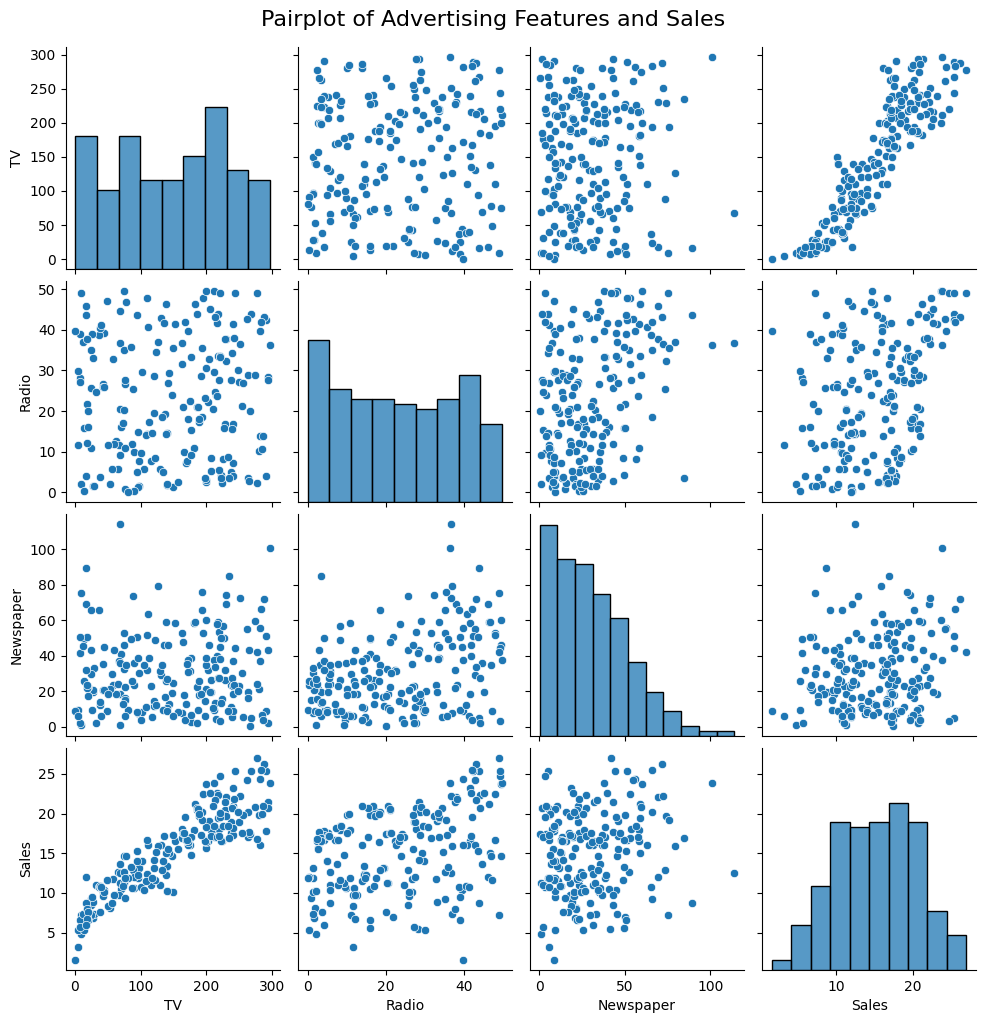

In [8]:
# Import warnings and filter warnings
warnings.filterwarnings("ignore")

# Visualization 1: Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(data)
plt.suptitle("Pairplot of Advertising Features and Sales", y=1.02, fontsize=16, ha='center')
plt.show()


**Tv vs. Sales Scatterplot:**

The scatterplot shows a clear positive trend, indicating that as the TV advertising expenditure increases, the sales also tend to increase.
This aligns with the correlation coefficient of **0.901** between TV and Sales, indicating a strong positive correlation.

**Radio vs. Sales Scatterplot:**


Similar to the TV vs. Sales scatterplot, there is a noticeable positive trend in the scatterplot for radio advertising expenditure and sales. As the expenditure on radio advertising increases, the sales also tend to increase. However, the relationship appears to be weaker compared to TV advertising, consistent with the correlation coefficient of **0.350** between Radio and Sales.

**Newspaper vs. Sales Scatterplot:**

The scatterplot for newspaper advertising expenditure and sales shows a less defined trend compared to TV and radio. There is a lot of scatter in the data points, indicating a weaker relationship. This is consistent with the correlation coefficient of **0.158** between Newspaper and Sales, indicating a weak positive correlation.

**Correlation Heatmap**

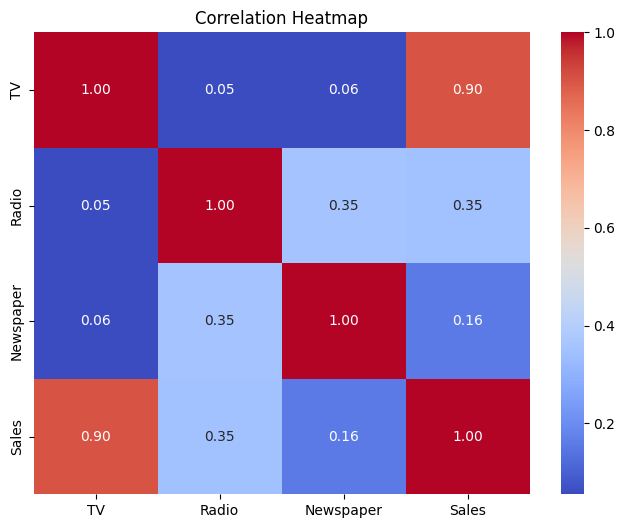

In [9]:
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**TV and Sales:** The correlation coefficient between TV advertising expenditure and sales is **0.901**, indicating a strong positive correlation. This suggests that as the amount spent on TV advertising increases, the sales of the product also tend to increase significantly. This aligns with the objective of the dataset, which involves predicting sales based on advertising expenditure.

**Radio and Sales:** The correlation coefficient between radio advertising expenditure and sales is **0.350**, indicating a moderate positive correlation. While not as strong as the correlation with TV advertising, there is still a noticeable positive relationship between radio advertising expenditure and sales. This implies that increasing spending on radio advertising may lead to a moderate increase in sales.

**Newspaper and Sales:** The correlation coefficient between newspaper advertising expenditure and sales is **0.158**, indicating a weak positive correlation. This suggests that there is a minimal relationship between newspaper advertising expenditure and sales. In other words, increasing spending on newspaper advertising may have only a slight impact on sales compared to TV and radio advertising.

Overall, the correlation table provides insights into the relationships between advertising expenditures on different platforms (TV, radio, newspaper) and the resulting sales. It confirms that TV advertising expenditure has the strongest influence on sales, followed by radio advertising, while newspaper advertising has the weakest impact. This information can be valuable for businesses in optimizing their advertising strategies to maximize sales potential.

# Model Development

XGBoost Regressor was selected for its ability to handle complex relationships and high performance in predicting sales based on advertising expenditures. With automatic handling of missing values, regularization to prevent overfitting, and feature importance scores for interpretability, XGBoost is an ideal choice for accurate sales prediction.

**Initialize XGBoost regressor**

In [10]:
xgb_model = XGBRegressor(random_state=42)

**Train the model on the training data**

In [11]:
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

**Predict on the test data**

In [12]:
y_pred = xgb_model.predict(X_test_scaled)

**Model Evaluation**

In [13]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 1.4514290545159532
Mean Absolute Error: 0.889899742603302
R-squared Score: 0.953029858014247


The evaluation metrics for our XGBoost model are as follows:

**Mean Squared Error (MSE)**: **1.4514**, measures the average squared difference between the predicted and actual values. In this case, the MSE indicates that, on average, the squared difference between the predicted and actual sales values is approximately 1.45 units. Lower values of MSE indicate better model performance.
Mean Absolute Error (MAE): **0.8899**

**MAE** measures the average absolute difference between the predicted and actual values. Here, the MAE indicates that, on average, the absolute difference between the predicted and actual sales values is approximately 0.89 units. Lower values of MAE indicate better model performance.
R-squared Score: **0.9530**

**R-squared (R2**) score represents the proportion of the variance in the dependent variable (sales) that is predictable from the independent variables (advertising expenditures). In this case, the R-squared score of approximately **0.953** indicates that the model explains around **95.3%** of the variance in the sales data, suggesting that the model fits the data very well.


Overall, these evaluation metrics indicate that our XGBoost model performs well in predicting sales based on advertising expenditures. The low values of MSE and MAE, along with the high R-squared score, demonstrate that the model accurately captures the relationship between advertising expenditures on different platforms and the resulting sales, with minimal prediction errors. This suggests that the model is effective in forecasting future sales, which can help businesses optimize their advertising strategies and maximize sales potential.

In [14]:
# Print the actual and predicted sales values side by side
predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(predictions_df)


     Actual Sales  Predicted Sales
95           16.9        17.179169
15           22.4        22.748325
30           21.4        20.578192
158           7.3         6.048757
128          24.7        23.735411
115          12.6        14.153012
69           22.3        23.154989
170           8.4         9.174483
174          16.5        17.041319
45           16.1        16.303110
66           11.0         7.986717
182           8.7         9.807733
165          16.9        17.305773
78            5.3         4.122222
186          10.3        12.088081
177          16.7        16.510164
56            5.5         4.040091
152          16.6        16.817339
82           11.3        11.620045
68           18.9        19.739996
124          19.7        20.458597
16           12.5        14.055775
148          10.9        10.093833
93           22.2        23.586964
65           11.3        11.256765
60            8.1         8.642781
84           21.7        23.066692
67           13.4   

# Insights from XGBoost Model Evaluation for Sales Prediction

Based on the evaluation of our XGBoost model for sales prediction using advertising expenditures, we can draw the following conclusions:

**Accuracy of Predictions:** The model achieved high accuracy in predicting sales based on advertising expenditures on TV, radio, and newspaper. This is evident from the low values of Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating minimal prediction errors.

**Effectiveness of Advertising Channels:** The model confirms that advertising expenditures on TV have the strongest positive impact on sales, followed by radio advertising. In contrast, newspaper advertising has a weaker influence on sales compared to TV and radio.

**Optimization Opportunities:** Businesses can utilize the insights provided by the model to optimize their advertising strategies. Allocating more resources to TV and radio advertising, which have demonstrated a stronger correlation with sales, can potentially yield higher returns on investment compared to newspaper advertising.

**Maximizing Sales Potential:** By leveraging the predictions generated by the model, businesses can make informed decisions regarding advertising budget allocation. By focusing resources on the most effective advertising channels, businesses can maximize their sales potential and achieve greater success in reaching their target audience.



In summary, our XGBoost model offers valuable insights into the relationship between advertising expenditures and sales, empowering businesses to make data-driven decisions and optimize their advertising strategies to maximize sales potential and achieve their goals.




